In [23]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
from scipy import stats

In [24]:
!wget http://clima-dods.ictp.it/Users/mabid/lecture_notes/sampledata2.txt
!wget http://clima-dods.ictp.it/Users/mabid/lecture_notes/sampledata.txt
!wget http://clima-dods.ictp.it/Users/mabid/lecture_notes/era5_tas_1959_2021_25deg.nc

--2023-03-10 02:31:05--  http://clima-dods.ictp.it/Users/mabid/lecture_notes/sampledata2.txt
Resolving clima-dods.ictp.it (clima-dods.ictp.it)... 140.105.16.180
Connecting to clima-dods.ictp.it (clima-dods.ictp.it)|140.105.16.180|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 296 [text/plain]
Saving to: ‘sampledata2.txt’

sampledata2.txt     100%[===================>]     296  --.-KB/s    in 0s      

2023-03-10 02:31:05 (50.4 MB/s) - ‘sampledata2.txt’ saved [296/296]

--2023-03-10 02:31:05--  http://clima-dods.ictp.it/Users/mabid/lecture_notes/sampledata.txt
Resolving clima-dods.ictp.it (clima-dods.ictp.it)... 140.105.16.180
Connecting to clima-dods.ictp.it (clima-dods.ictp.it)|140.105.16.180|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300 [text/plain]
Saving to: ‘sampledata.txt’

sampledata.txt      100%[===================>]     300  --.-KB/s    in 0s      

2023-03-10 02:31:06 (63.6 MB/s) - ‘sampledata.txt’ saved [300/300]

--2

correlation coeffecient: [0.41151914]


Text(0, 0.5, 'Data 2')

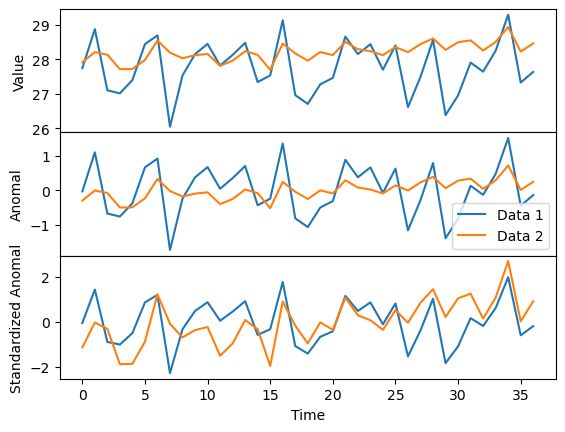

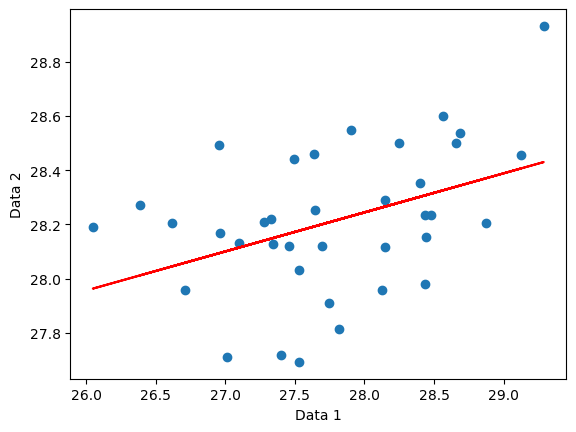

In [25]:
# load data
x = np.loadtxt("sampledata.txt")
y = np.loadtxt("sampledata2.txt")

# plot
fig, ax = plt.subplots(3,1)
ax[0].plot(x)
ax[0].plot(y)
xAnomal = x - np.mean(x)
yAnomal = y - np.mean(y)
ax[1].plot(xAnomal, label = "Data 1")
ax[1].plot(yAnomal, label = "Data 2")
ax[1].legend()
xAnomalStd = xAnomal/np.std(x)
yAnomalStd = yAnomal/np.std(y)
ax[2].plot(xAnomalStd )
ax[2].plot(yAnomalStd)
ax[2].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[1].set_ylabel("Anomal")
ax[2].set_ylabel("Standardized Anomal")
fig.subplots_adjust(hspace=.0)

# covariance and correlation
covxy = np.dot(xAnomal,(np.atleast_2d(yAnomal).T))/(len(x))
r = covxy/(np.std(x)*np.std(y))
print("correlation coeffecient:", r)
plt.figure()
plt.scatter(x,y)
slope, intercept, r, p, std_err = stats.linregress(x, y)
func = lambda x: slope*x + intercept
mymodel = list(map(func, x))
plt.plot(x, mymodel, 'r')
plt.xlabel("Data 1")
plt.ylabel("Data 2")

Text(0.0, 1.0, 'Mean Temperature')

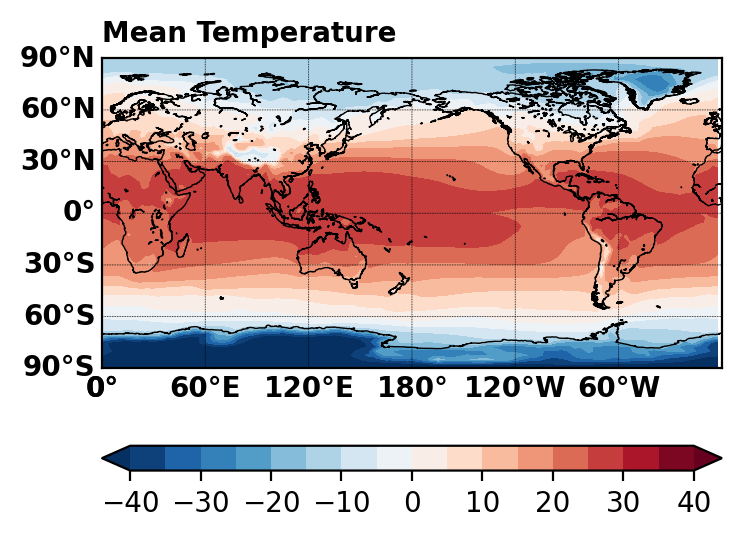

In [26]:

file2 = "/home/ben/ictp/numforGeosciences-ICTP/datasets/lec1-era5_tas_1959_2021_25deg.nc"
f1 = nc.Dataset(file2)
lon = f1.variables['lon'][:]
lat = f1.variables['lat'][:]
var = f1.variables['t2m'][:,:,:]
tas = np.average(var-273.15, axis=0)
lonall, latall = np.meshgrid(lon, lat)
parallels = np.arange(-90,90+1,30.) # make latitude lines
meridians = np.arange(-180,180,60.) # make longitude lines

# plot
plt.figure(num=None, figsize=(4, 4), dpi=200, facecolor='w', edgecolor='k')
m = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution="l")
m.drawcoastlines(linewidth=0.5)
x, y = m(lonall, latall)
levels=[-40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40]
jjj=m.contourf(x,y,tas[:,:],levels=levels, extend = 'both', cmap=plt.cm.RdBu_r)
m.colorbar(jjj,location='bottom',size="8%",pad='25%')
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,weight='bold',linewidth=0.3)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10,weight='bold', linewidth=0.3)
plt.title("Mean Temperature",loc='left',fontsize=10,weight='bold')

Text(0.0, 1.0, 'Standard Deviation Temperature')

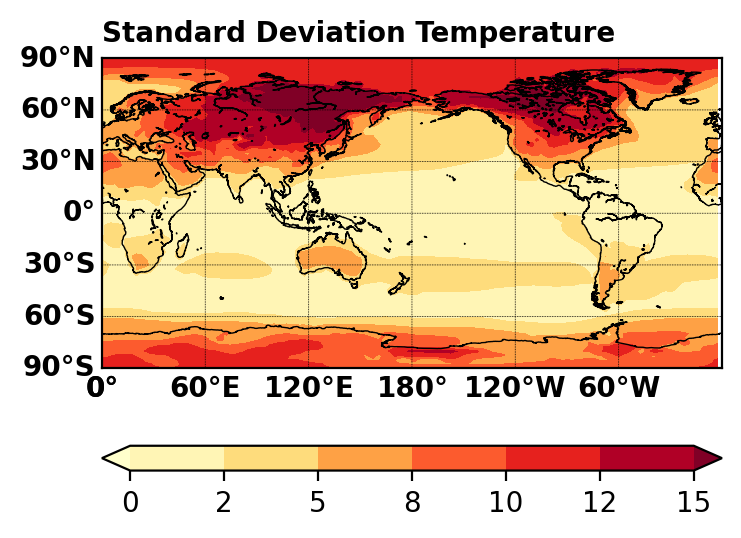

In [27]:
standardvar = np.zeros((len(lat), len(lon)))
for i in range(len(lat)):
    for j in range(len(lon)):
        standardvar[i, j] = np.std(var[:,i,j])

# plot
plt.figure(num=None, figsize=(4, 4), dpi=200, facecolor='w', edgecolor='k')
m = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution="l")
m.drawcoastlines(linewidth=0.5)
x, y = m(lonall, latall)
levels=[0, 2, 5, 8, 10, 12, 15]
jjj=m.contourf(x,y,standardvar,levels=levels, extend = 'both', cmap=plt.cm.YlOrRd)
m.colorbar(jjj,location='bottom',size="8%", pad='25%')
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,weight='bold',linewidth=0.3)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10,weight='bold', linewidth=0.3)
plt.title("Standard Deviation Temperature", loc='left',fontsize=10,weight='bold')

Text(0.0, 1.0, 'Variance Temperature')

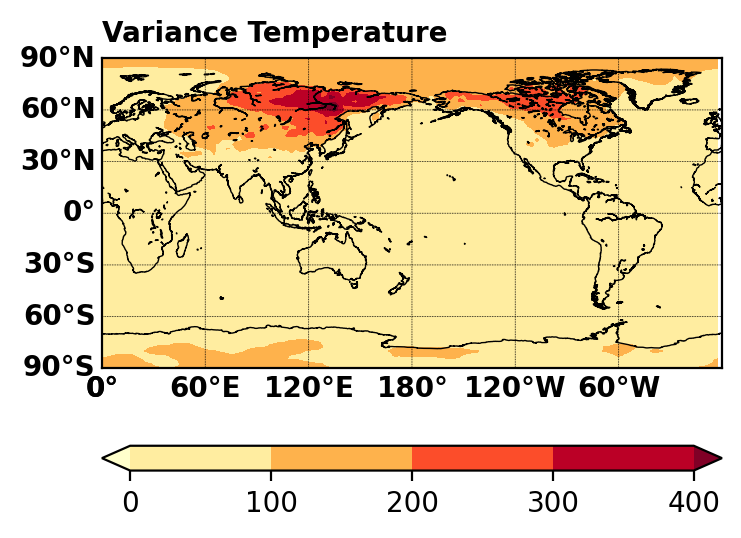

In [28]:
varvar = np.zeros((len(lat), len(lon)))
for i in range(len(lat)):
    for j in range(len(lon)):
        varvar[i, j] = np.var(var[:,i,j])

# plot
plt.figure(num=None, figsize=(4, 4), dpi=200, facecolor='w', edgecolor='k')
m = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution="l")
m.drawcoastlines(linewidth=0.5)
x, y = m(lonall, latall)
levels=[0, 100, 200, 300, 400]
jjj=m.contourf(x,y,varvar,levels=levels, extend = 'both', cmap=plt.cm.YlOrRd)
m.colorbar(jjj,location='bottom',size="8%", pad='25%')
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,weight='bold',linewidth=0.3)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10,weight='bold', linewidth=0.3)
plt.title("Variance Temperature", loc='left',fontsize=10,weight='bold')
